In [1]:
#Load Packages
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# Import train_test_split function
from sklearn.model_selection import train_test_split
#Importing confusion matrix
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score,classification_report
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("same_publishing_timing.csv")

# Random Forest
### First MODEL with trending days up to 46 days


#### Train test split

In [3]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count,Number_of_days_it_trended
count,21513.000000,2.151300e+04,2.151300e+04,21513.000000,2.151300e+04,21513.000000
mean,18.840422,2.889315e+06,1.464757e+05,2549.975875,1.168235e+04,5.516943
std,6.709795,7.098768e+06,4.092569e+05,12139.271975,8.967709e+04,1.991966
min,1.000000,4.347200e+04,0.000000e+00,0.000000,0.000000e+00,1.000000
25%,17.000000,5.971490e+05,2.135800e+04,150.000000,1.538000e+03,4.000000
50%,20.000000,1.218600e+06,5.216500e+04,605.000000,3.432000e+03,5.000000
75%,24.000000,2.667572e+06,1.325160e+05,1754.000000,8.052000e+03,6.000000
max,29.000000,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06,36.000000


Accuracy of Random Forest Classifier:  27.4 % (rounded to 1 decimal place)


C:\Users\jefft\juypter\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jefft\juypter\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jefft\juypter\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.28      0.06      0.10        81
           2       0.06      0.01      0.02       115
           3       0.20      0.07      0.10       352
           4       0.30      0.30      0.30       938
           5       0.31      0.45      0.37      1416
           6       0.26      0.34      0.29      1187
           7       0.20      0.14      0.17       693
           8       0.19      0.08      0.12       299
           9       0.04      0.01      0.01       127
          10       0.00      0.00      0.00        78
          11       0.00      0.00      0.00        26
          12       0.00      0.00      0.00        36
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         2
          20       0.00    

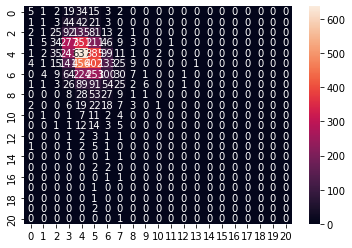

In [4]:
X=df[['view_count', 'categoryId', 'comment_count','likes','dislikes']]  # Features
y=df['Number_of_days_it_trended']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% training and 25% test
X_train.shape, X_test.shape

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Create our predictions
prediction = clf.predict(X_test)

# Display accuracy score
print("Accuracy of Random Forest Classifier: ",round(accuracy_score(y_test, prediction)*100,1), '\b% (rounded to 1 decimal place)')

sb.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt=".0f", annot_kws={"size": 10})
print(classification_report(y_test, prediction))

## Second Model up to 10 days

### change the number of days it trended to < 10 days

In [5]:
df2 = df[df['Number_of_days_it_trended'] < 10]

In [6]:
df2.describe()

,categoryId,view_count,likes,dislikes,comment_count,Number_of_days_it_trended
count,20843.000000,2.084300e+04,2.084300e+04,20843.000000,2.084300e+04,20843.000000
mean,18.849398,2.757016e+06,1.414850e+05,2420.320587,1.128068e+04,5.317613
std,6.705851,6.638645e+06,3.991006e+05,11892.971355,8.842792e+04,1.584510
min,1.000000,4.347200e+04,0.000000e+00,0.000000,0.000000e+00,1.000000
25%,17.000000,5.884650e+05,2.093800e+04,141.000000,1.507000e+03,4.000000
50%,20.000000,1.194628e+06,5.117300e+04,582.000000,3.363000e+03,5.000000
75%,24.000000,2.589374e+06,1.290525e+05,1693.500000,7.823500e+03,6.000000
max,29.000000,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06,9.000000


Accuracy of Random Forest Classifier:  27.9 % (rounded to 1 decimal place)
              precision    recall  f1-score   support

           1       0.27      0.04      0.07        96
           2       0.11      0.02      0.03       128
           3       0.16      0.04      0.07       381
           4       0.28      0.28      0.28       923
           5       0.32      0.44      0.37      1421
           6       0.27      0.37      0.31      1152
           7       0.19      0.14      0.16       677
           8       0.24      0.10      0.15       306
           9       0.06      0.01      0.01       127

    accuracy                           0.28      5211
   macro avg       0.21      0.16      0.16      5211
weighted avg       0.26      0.28      0.26      5211



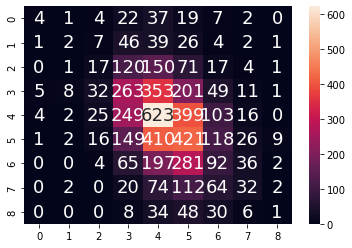

In [7]:
X=df2[['view_count', 'categoryId', 'comment_count','likes','dislikes']]  # Features
y=df2['Number_of_days_it_trended']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% training and 25% test

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Create our predictions
prediction = clf.predict(X_test)

# Display accuracy score
print("Accuracy of Random Forest Classifier: ",round(accuracy_score(y_test, prediction)*100,1), '\b% (rounded to 1 decimal place)')
sb.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt=".0f", annot_kws={"size": 18})
print(classification_report(y_test, prediction))

## Third Model up to 5 days

In [8]:
df3 = df[df['Number_of_days_it_trended'] < 5]


In [9]:
df3.describe()

,categoryId,view_count,likes,dislikes,comment_count,Number_of_days_it_trended
count,5992.000000,5.992000e+03,5.992000e+03,5992.000000,5.992000e+03,5992.000000
mean,19.151368,1.611511e+06,8.342379e+04,1290.045895,6.461412e+03,3.425901
std,6.117659,4.638818e+06,2.750710e+05,4780.933387,8.980886e+04,0.868705
min,1.000000,4.347200e+04,0.000000e+00,0.000000,0.000000e+00,1.000000
25%,17.000000,4.053658e+05,1.251350e+04,0.000000,9.177500e+02,3.000000
50%,20.000000,7.865985e+05,3.008800e+04,343.000000,2.085500e+03,4.000000
75%,24.000000,1.661012e+06,7.872350e+04,987.250000,4.532250e+03,4.000000
max,29.000000,2.644074e+08,1.602153e+07,150989.000000,6.738537e+06,4.000000


Accuracy of Random Forest Classifier:  60.5 % (rounded to 1 decimal place)
              precision    recall  f1-score   support

           1       0.29      0.09      0.13        80
           2       0.00      0.00      0.00       114
           3       0.27      0.10      0.15       351
           4       0.65      0.91      0.76       953

    accuracy                           0.61      1498
   macro avg       0.30      0.27      0.26      1498
weighted avg       0.49      0.61      0.52      1498



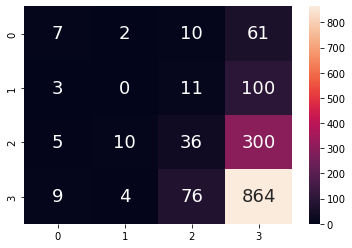

In [10]:
X=df3[['view_count', 'categoryId', 'comment_count','likes','dislikes']]  # Features
y=df3['Number_of_days_it_trended']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% training and 25% test

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Create our predictions
prediction = clf.predict(X_test)

# Display accuracy score
print("Accuracy of Random Forest Classifier: ",round(accuracy_score(y_test, prediction)*100,1), '\b% (rounded to 1 decimal place)')


sb.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt=".0f", annot_kws={"size": 18})
print(classification_report(y_test, prediction))

# Conclusion

For this random forest machine learning, we went on doing three different model based on the range of trending days we are predicting, up to 46 days , 10days and 5 days respectively.

We then calculated the accurracy , precision, recall , F1-score for each of the model and also made a confusion matrix
We realised that as the data size is getting smaller along with the ability of how many days can the model predict up to, the overall accurracy , precision , recall and F1-score all increased. The accuracy was improved by atleast two times from the inital value of 23.2% to 55%. The F1-score for model 3 was also the greatest which proved the last model was the best among all. 

However, the random forest creates a lot of trees which make the machine learning complicated and thus we are not able to show a visulisation of the random forest. For our codes to run , it takes up a longer time than the MLP machine learning dued to its time complexity while it yielded a lesser accuracy compared to MLP. Thus, MLP is then evaluated as a better model to predict our problem.

